In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [2]:
df=pd.read_csv('D:\Bengaluru_House_Data.csv')
df.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1=df.drop(['area_type','availability','society'],axis='columns')
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [6]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2=df1.dropna()
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
df2[df2['size']=='1 RK']

,location,size,total_sqft,bath,balcony,price
24,Thanisandra,1 RK,510,1.0,0.0,25.25
782,Thanisandra,1 RK,445,1.0,0.0,28.00
1363,Thanisandra,1 RK,510,1.0,1.0,25.25
2486,Bhoganhalli,1 RK,296,1.0,0.0,22.89
2557,Anekal,1 RK,351,1.0,1.0,16.00
2788,Rachenahalli,1 RK,440,1.0,0.0,28.00
4876,Electronic City,1 RK,435,1.0,1.0,19.50
5079,Whitefield,1 RK,905,1.0,1.0,52.00
5285,Rachenahalli,1 RK,385 - 440,1.0,0.0,19.80
6586,Electronics City Phase 1,1 RK,360,1.0,0.0,16.90


In [11]:
df3=df2.replace('1 RK','1 BHK')
df3

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '4 BHK',
       '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom', '7 Bedroom',
       '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK', '9 BHK',
       '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom', '14 BHK',
       '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'], dtype=object)

In [13]:
df3['bedrooms']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [14]:
df3['bedrooms'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
df3[df3['bedrooms']>20]

,location,size,total_sqft,bath,balcony,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[-df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [19]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(4)

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bedrooms              4
Name: 30, dtype: object

In [22]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head(4)

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861


In [23]:
len(df5['location'].unique())

1265

In [24]:
df5['location']=df5['location'].apply(lambda x:x.strip())
loc_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [25]:
loc_stats_less_than_10=loc_stats[loc_stats<=10]
loc_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [27]:
df5['location']=df5.location.apply(lambda x:'other' if x in loc_stats_less_than_10 else x)
df5.head()

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
df5[(df5['total_sqft']/df5.bedrooms)<300].head()

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [33]:
df6=df5[~(df5['total_sqft']/df5.bedrooms<300)]
df6

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [34]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def rem_outliers(df):
    new_df=pd.DataFrame()
    for name,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        new_df=pd.concat([new_df,reduced_df],ignore_index=True)
    return new_df

df7=rem_outliers(df6)
df7

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...
9843,other,2 BHK,1256.0,2.0,1.0,65.00,2,5175.159236
9844,other,2 BHK,1353.0,2.0,2.0,110.00,2,8130.081301
9845,other,1 Bedroom,812.0,1.0,0.0,26.00,1,3201.970443
9846,other,3 BHK,1440.0,2.0,2.0,63.93,3,4439.583333


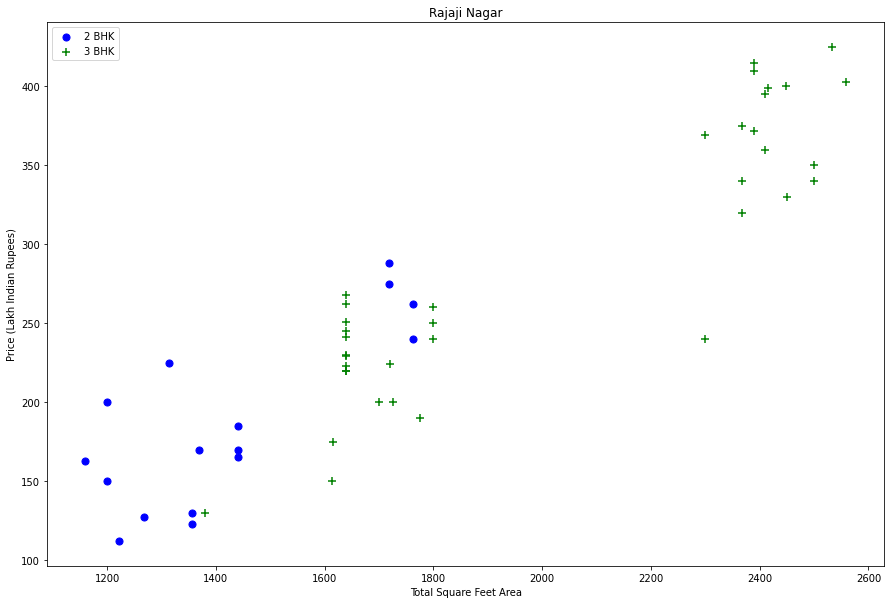

In [45]:
%matplotlib inline
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.bedrooms==3)]
    plt.figure(figsize = (15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

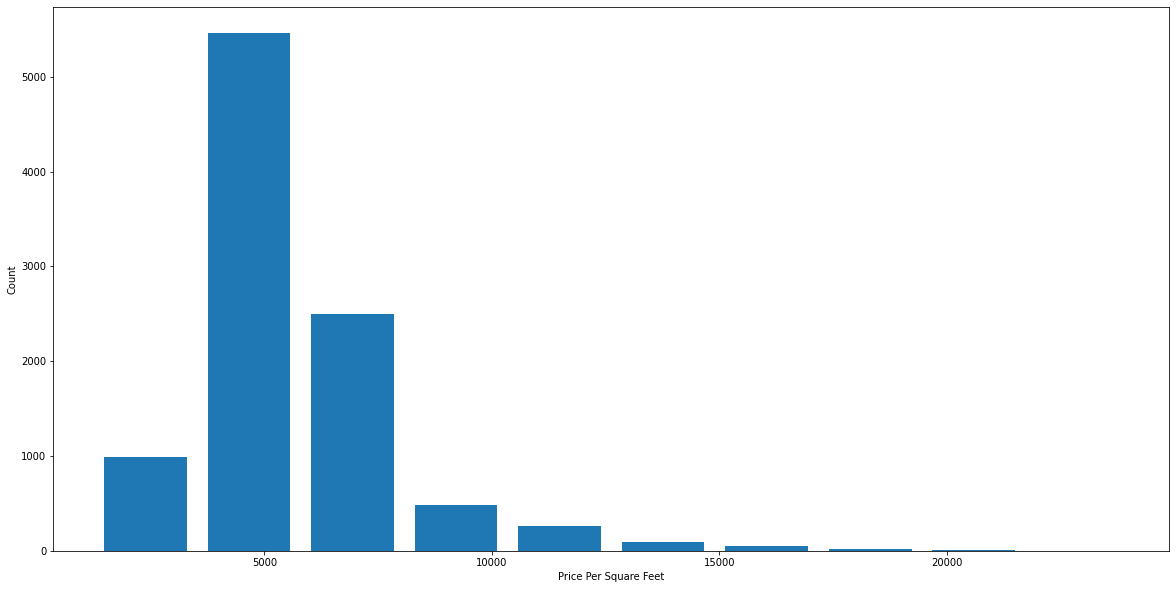

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [49]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [50]:
df8=df7.drop(['size','total_sqft'],axis='columns')
df8

,location,bath,balcony,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
9843,other,2.0,1.0,65.00,2,5175.159236
9844,other,2.0,2.0,110.00,2,8130.081301
9845,other,1.0,0.0,26.00,1,3201.970443
9846,other,2.0,2.0,63.93,3,4439.583333


In [52]:
dummies=pd.get_dummies(df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,location,bath,balcony,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,1.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,2.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,3.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,0.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10=df9.drop('location',axis='columns')
df10

,bath,balcony,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,1.0,428.00,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.00,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.00,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,130.00,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,148.00,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,2.0,1.0,65.00,2,5175.159236,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9844,2.0,2.0,110.00,2,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1.0,0.0,26.00,1,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9846,2.0,2.0,63.93,3,4439.583333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10.shape

(9848, 242)

In [58]:
x=df10.drop('price',axis='columns')
x.head()

,bath,balcony,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,1.0,4,15017.543860,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,3,11901.840491,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3,12533.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,3,10833.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,2,11983.805668,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.771551589236064

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.73208502, 0.75694837, 0.73227754, 0.74239976, 0.76223708])

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.745190,{'normalize': True}
1,lasso,0.729589,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.518258,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [78]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    t= np.zeros(len(x.columns))
    t[0] = sqft
    t[1] = bath
    t[2] = bhk
    if loc_index >= 0:
        t[loc_index] = 1

    return lr_clf.predict([t])[0]

In [79]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

24894.019361440973

In [76]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

24911.072484025175

In [77]:
predict_price('Indira Nagar',1000, 2, 2)

24894.792638023726

In [80]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

24907.361948404356

In [82]:
import pickle
with open('Banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)